# OVERVIEW

**Research Question**

Can we predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)?

**Summary Tables**

Arkansas

| Location| Growth Calculation | Forecast % Inc. Price | Forecast 2018 Price| RMSE |  Technique | Data |
| --- | --- | --- | --- | --- | --- | --- |
| Hot Springs | 2017-2018 | 1.4% | \$133,816 | $5285 | ARIMA | Zillow 1997-2017 Monthly |
| Fayetteville | 2017-2018 | 2.5% | \$172,517 | \$7132 | ARIMA | Zillow 1997-2017 Monthly |
| Little Rock | 2017-2018 | 3.8% | \$145,683 | \$5633 | ARMIA | Zillow 1997-2017 Monthly |
| Searcy | 2017-2018 | 3.2% | \$95,435 | \$8018 | Prophet | Zillow 1997-2017 Monthly

USA

| Location| Growth Calculation | Recommended Zip Codes | Forecast % inc. Price | Forecast % inc. GDP | RMSE % (rmse/actual) | Technique | Data |
| --- | --- | --- | --- | --- | --- | --- | --- |
| USA | 2017-2018 | 08401,08232, 08241| 39-75% |  3.7-6.7% | 26-63% | Prophet | Zillow 1997-2017 Annual, GDP 2001-2007 Annual
| USA | 1997-2018 | 90403, 90027, 90020 | 483-556% | 93-147% | 11-13% | Prophet | Zillow 1997-2017 Annual, GDP 2001-2017 Annual |

08401, 08232, 08241 Zip Codes

| Location| Growth Calculation | Forecast % Inc. Price | Forecast 2018 Price| RMSE |  Technique | Data |
| --- | --- | --- | --- | --- | --- | --- |
| 08401 | 2017-2018 | % | \$ | $ |  | Zillow 1997-2017 Monthly |
| 08232 | 2017-2018 | % | \$ | \$ |  | Zillow 1997-2017 Monthly |
| 08241 | 2017-2018 | % | \$ | \$ |  | Zillow 1997-2017 Monthly |



**Scope**
 
 * Analysis of the following for real estate in these Arkansas metro areas - Hot Springs, Little Rock, Fayetteville, Searcy
  * Time series plots - Section 1.2
  * Average at the metro area level - Section 1.2.
 * Forecast the following for the USA:
  * Average at the metro area level
  * Model(s) for forecasting average median housing value by zip code for 2018 - Section 2.0
  * Use the historical data from 1997 through 2017 as training data
  * Integrate data from other sources (Bureau of Labor Statistics - Gross Domestic Product (GDP) by county) - Section 1.3, 1.6.2, 2.1.1

**Questions** 

 * What technique/algorithm/decision process used?
  * After importing and processing the Zillow data, it contained 3.3 million observations.  It was estimated that a time series models with weekly data would require over 50 hours of processing for 12,652 zip codes.  The decision was made to group the data by years to reduce the processing time and a model could be run using Facebook's Prophet in about 4 hours for all 12,652 zip codes.
  * Another design decision around the time frame for the forecasts.  The research question did not state whether the REIT was interested in a short term of long term view.  For this reason, the models were built with a short term using a 1 year growth from 2017 to the forecast for 2018 and a long term view from 1997 to the forecasted 2018 housing prices.

**Conclusion**
 * What three zip codes provide the best investment opportunity for the SREIT?
  * The long term forecast using Zillow data identified 4 of the top 5 zip codes for % growth from 1997 to forecast 2018 in California (with one in New York).  After using GDP data on the top Zillow zip codes, it was determined that 90403 (Santa Monica) and 90027/90020 (Los Angeles) provided the best long term potential.
  * The short term forecast using Zillow data provided more surprising and interesting results.  Looking at the increase from 2017 to projected 2018, identified cities in the northeast that were impacted by Hurricane Sandy in 2012.  The top zip codes short term were 08401/08232 (Atlantic City) and 08241 (Galloway, NJ).  Since this area was devastated by the 2012 storm, it is expected that the area will rebound in 2018.  This rebuilding was also highlighted in the 2017 New York Times article, "Not Your Mother's Jersey Shore".
  * The RMSE percent error (RMSE/Actual) for the top zip codes ranged from 26-63% for the short term forecast and 11-13% for the long range forecast.  This variation is expected and the AtsPy provides a better prediction on the top zip codes where multiple techniques are evaluated (see Section 2.2.2 for details)
  * Please see the table above and Section 3.0 for more details on the interpretation of the models.

 * Bonus: Develop a geographic visualization that in your view best depicts the data and recommendations by state

**Data**

Zillow housing data from 1997-2018 (files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)

**Technology**

* Facebook's Prophet was utilized for the high volume series modeling
* AtsPy (Automated Time Series Forecasting for Python) was used for the metro areas of Arkansas and for more detailed analysis of the top zip codes using ARIMA, Prophet and Gluonts techniques.  More information on AtsPy can be found at https://github.com/firmai/atspy.

# 1.0 - OBTAIN - SCRUB - EXPLORE

# 1.1 - Arkansas Data - Obtain and Scrub

In [0]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pandas import Series
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import r2_score # Import a scoring metric to compare methods
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet
import datetime
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import csv
import io

In [0]:
#Load the data from Zillow
url= "https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv"
zillow = pd.read_csv(url)

In [0]:
zillowAR = zillow.query('Metro in ["Hot Springs", "Little Rock-North Little Rock-Conway", "Fayetteville-Springdale-Rogers", "Searcy"]')

In [0]:
# Drop 1996 columns
zillowAR = zillowAR.drop(['RegionType','StateName','1996-01-31','1996-02-29','1996-03-31','1996-04-30','1996-05-31','1996-06-30','1996-07-31','1996-08-31','1996-09-30','1996-10-31','1996-11-30','1996-12-31'], axis=1)

In [0]:
## INSERT NAN IN PLACE OF BLANKS AND SEE TUTORIAL BELOW FOR OPTIONS WITH NAN

#zillowARnan = zillowAR.replace('', np.nan, inplace=True)

#Confirm this code works correctly
#zillowARnan = (zillowAR.replace(r'^\s*$', np.nan, regex=True))

# Dropna deletes 32 of 136 rows
# Determine if a better appraoch is to remove some dates 
#zillowAR = zillowAR.dropna()

In [0]:
#Use melt to add date columns to rows
zillowARtrans = zillowAR.melt(id_vars=["RegionID", "SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Date", 
        value_name="Value")

In [0]:
zillowARtrans['Date'] = pd.to_datetime(zillowARtrans['Date'], format='%Y-%m-%d')
#zillowARtrans['YM'] = zillowARtrans.loc[zillowARtrans['Year','Month']]

zillowARtrans['YM'] = pd.to_datetime(zillowARtrans.Date).dt.to_period('m')

In [0]:
# Check shape
zillowARtrans.shape

(37944, 10)

In [0]:
print (zillowARtrans.isnull().sum())

RegionID         0
SizeRank         0
RegionName       0
State            0
City             0
Metro            0
CountyName       0
Date             0
Value         4900
YM               0
dtype: int64


In [0]:
# The RegionName is the zip code but is missing zeros, change to 5 digits
zillowARtrans['RegionName'] = zillowARtrans['RegionName'].astype('str').apply(lambda x: x.zfill(5))

In [0]:
#Put Values into buckets before running crosstab
#pd.crosstab(index=zillowARtrans['Metro'],columns=zillowARtrans['Value'])

In [0]:
zillowARtrans.Metro.value_counts()

Little Rock-North Little Rock-Conway    17298
Fayetteville-Springdale-Rogers          13671
Searcy                                   5022
Hot Springs                              1953
Name: Metro, dtype: int64

In [0]:
zillowARtrans.CountyName.value_counts()

Pulaski County       6696
White County         5022
Benton County        4743
Washington County    4464
Lonoke County        3069
Faulkner County      2790
Saline County        2790
McDonald County      2511
Madison County       1953
Garland County       1953
Perry County         1116
Grant County          837
Name: CountyName, dtype: int64

In [0]:
zillowARtrans.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
YM                 period[M]
dtype: object

In [0]:
zillowARtrans.index = zillowARtrans['Date']
zillowARtrans

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Date,Value,YM
Date,,,,,,,,,,
1997-01-31,89249,332,71913,AR,Hot Springs,Hot Springs,Garland County,1997-01-31,90258.0,1997-01
1997-01-31,89319,664,72034,AR,Conway,Little Rock-North Little Rock-Conway,Faulkner County,1997-01-31,103502.0,1997-01
1997-01-31,89707,870,72701,AR,Fayetteville,Fayetteville-Springdale-Rogers,Washington County,1997-01-31,96387.0,1997-01
1997-01-31,89749,916,72764,AR,Springdale,Fayetteville-Springdale-Rogers,Washington County,1997-01-31,93065.0,1997-01
1997-01-31,89745,1592,72758,AR,Rogers,Fayetteville-Springdale-Rogers,Benton County,1997-01-31,139311.0,1997-01
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,89420,32332,72165,AR,Bradford,Searcy,White County,2020-03-31,61563.0,2020-03
2020-03-31,89739,32559,72749,AR,Morrow,Fayetteville-Springdale-Rogers,Washington County,2020-03-31,139836.0,2020-03
2020-03-31,89346,33411,72066,AR,Carlisle,Little Rock-North Little Rock-Conway,Lonoke County,2020-03-31,144633.0,2020-03


In [0]:
# Add month and year columns
# zillowARtrans['Year'] = zillowARtrans.index.year
# zillowARtrans['Month'] = zillowARtrans.index.month
# zillowARtrans

In [0]:
#Impute missing Values
#dfImpute = zillowARtrans.assign(InterpolateTime=zillowARtrans.Value.interpolate(method='time'))
#dfImpute[dfImpute['Value'].isnull()]

In [0]:
#Data for 1997 to 2017
zillowARtrans97to17 = zillowARtrans.loc['1997-01-31':'2017-12-31']

In [0]:
# Convert dataframe to series format
zillowARseries = pd.Series(zillowARtrans['Value'], index=zillowARtrans.index)

# 1.2 - Arkansas Explore

In [0]:
# Use seaborn style defaults and set the default figure size
#sns.set(rc={'figure.figsize':(11, 4)})

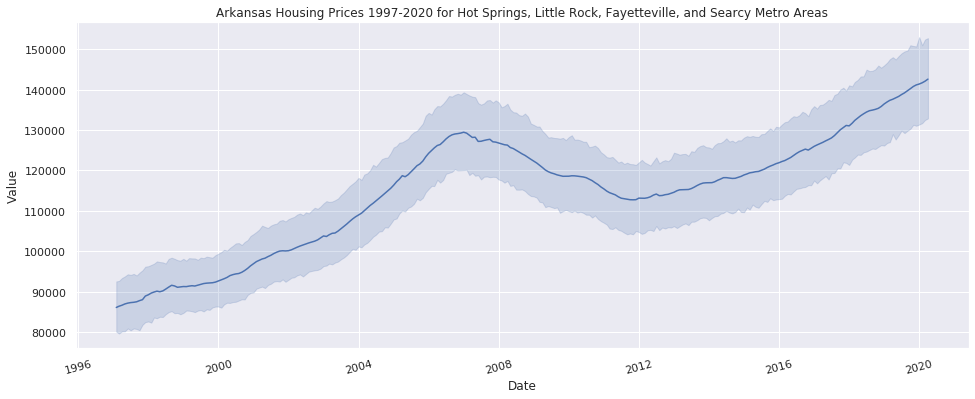

In [0]:
#Use this plot, figure out why year isn't working
plt.figure(figsize=(16, 6))
plt.clf()
sns.lineplot(x="Date", y="Value", data=zillowARtrans)
plt.xticks(rotation=15)
plt.title('Arkansas Housing Prices 1997-2020 for Hot Springs, Little Rock, Fayetteville, and Searcy Metro Areas')
plt.show()

(array([2194., 7454., 8913., 6982., 4344., 1720.,  528.,  549.,  175.,
         185.]),
 array([ 21450. ,  53192.1,  84934.2, 116676.3, 148418.4, 180160.5,
        211902.6, 243644.7, 275386.8, 307128.9, 338871. ]),
 <a list of 10 Patch objects>)

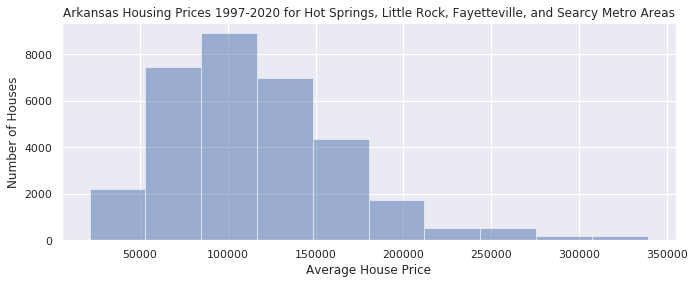

In [0]:
plt.title('Arkansas Housing Prices 1997-2020 for Hot Springs, Little Rock, Fayetteville, and Searcy Metro Areas')
#plt.figure(figsize=(16, 6))
plt.xlabel('Average House Price')
plt.ylabel('Number of Houses')
plt.hist(zillowARtrans['Value'], alpha=0.5)

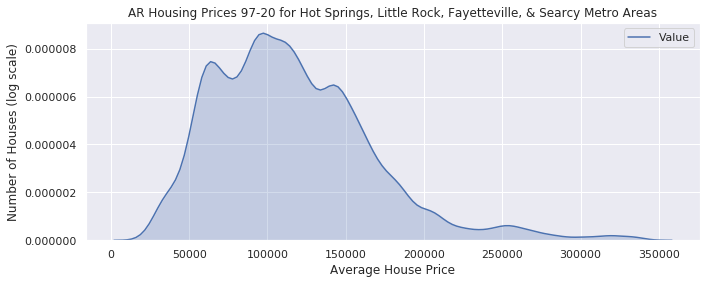

In [0]:
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
#plt.figure(figsize=(20,1))
plt.xlabel('Average House Price')
plt.ylabel('Number of Houses (log scale)')
sns.kdeplot(zillowARtrans['Value'], shade=True)

In [0]:
# Plot 1996 to 2020 Values
#zillowARtrans['Value'].plot(linewidth=0.5);

#Source: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

[Text(0, 0, 'Hot\nSprings'),
 Text(0, 0, 'Little\nRock-North\nLittle\nRock-\nConway'),
 Text(0, 0, 'Fayettevil\nle-Springd\nale-Rogers'),
 Text(0, 0, 'Searcy')]

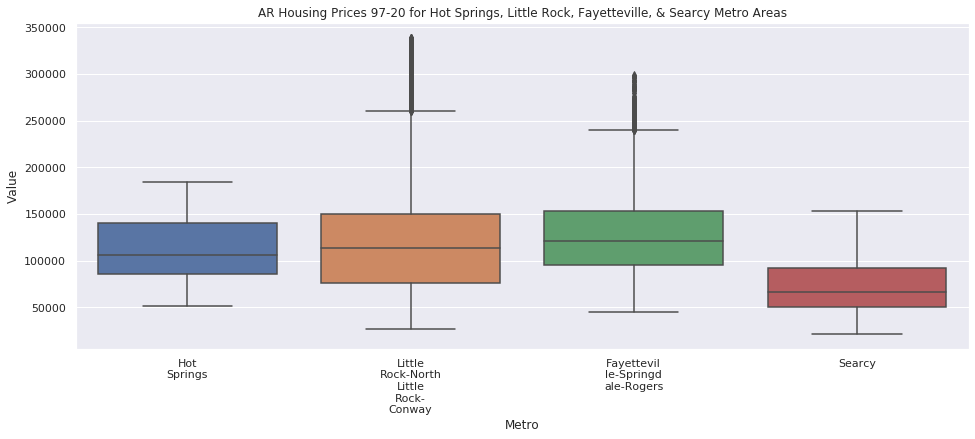

In [0]:
import textwrap
plt.figure(figsize=(16, 6))
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
ax = sns.boxplot(data=zillowARtrans, x='Metro', y='Value');
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

In [0]:
# Use this plot, why is year not working
# import seaborn as sns
# plt.figure(figsize=(16, 6))
# sns.set(style="darkgrid")

# # Load an example dataset with long-form data
# #fmri = sns.load_dataset("zillowARtrans")

# # Plot the responses for different events and regions
# sns.lineplot(x="Year", y="Value",
#              hue="Metro",
#              data=zillowARtrans)

In [0]:
# Need to remove missing values for this to run
# from pylab import rcParams

# res = sm.tsa.seasonal_decompose(zillowARtrans.Value,
#                                 freq=12,
#                                 model='additive')
# resplot = res.plot()
# resplot.savefig('Seasonal_Decompose.png', dpi=150)

In [0]:
# Changing index to monthly due to ARIMA error message
#zillowARtrans.index = pd.DatetimeIndex(zillowARtrans.index).to_period('M')

In [0]:
# START PLOTS FROM DEPTONETIMESERIES

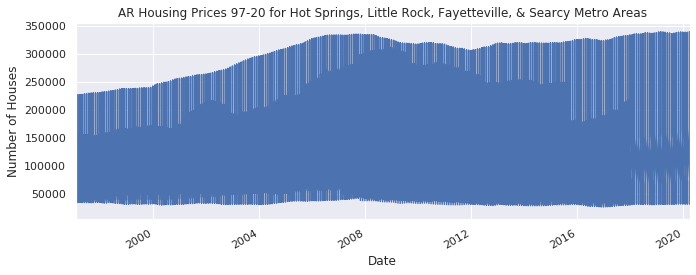

In [0]:
from matplotlib import pyplot
zillowARseries.plot()
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
plt.ylabel('Number of Houses')
pyplot.show()

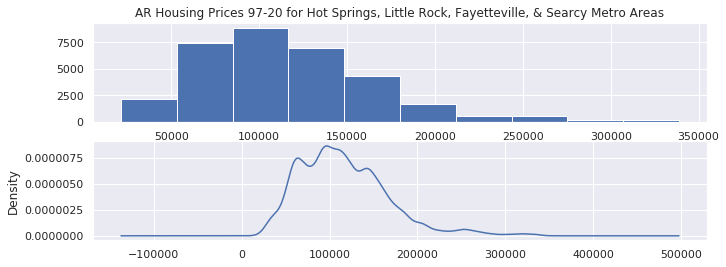

In [0]:
pyplot.figure(1)
pyplot.subplot(211)
zillowARseries.hist()
plt.title('AR Housing Prices 97-20 for Hot Springs, Little Rock, Fayetteville, & Searcy Metro Areas')
pyplot.subplot(212)
zillowARseries.plot(kind='kde')

# 1.3 - GDP Data - Obtain and Scrub

Sources: 

https://data.world/nrippner/fips-to-zip-code-crosswalk

Real GDP (thousands of chained 2012 dollars) 2001_2018 
https://apps.bea.gov/regional/Downloadzip.cfm

In [0]:
#Load the data from data.world crosswalk for country to zip code conversion
#path= "/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ZIP-COUNTY-FIPS_2017-06.csv"
crosswalk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ZIP-COUNTY-FIPS_2017-06.csv',engine='python')
#crosswalk = pd.read_csv('/content/ZIP-COUNTY-FIPS_2017-06.csv',engine='python')
crosswalk = crosswalk.rename(columns = {'STCOUNTYFP':'GeoFIPS'})
crosswalk = crosswalk[~crosswalk['STATE'].isin(['PR','VI','GU'])]
crosswalk['ZIP'] = crosswalk['ZIP'].astype('str').apply(lambda x: x.zfill(5))
crosswalk

,ZIP,COUNTYNAME,STATE,GeoFIPS,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1
...,...,...,...,...,...
52566,82729,Weston County,WY,56045,H1
52567,82730,Weston County,WY,56045,H1
52568,82701,Weston County,WY,56045,H1
52569,82723,Weston County,WY,56045,H1


In [0]:
#Check to insure Puerto Rico, Virgin Islands and Guam were removed from data
crosswalk.STATE.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [0]:
#Load the data from bea.gov on GDP data from 2001-2018
path= "/content/drive/My Drive/Colab Notebooks/IST718/Lab2/RealGDP.csv"
#path = '/content/RealGDP.csv'
gdp = pd.read_csv(path, encoding = "ISO-8859-1")

In [0]:
GDPmerged = pd.merge(gdp, crosswalk, on='GeoFIPS', how="left")
GDPmerged = GDPmerged.dropna()
GDPmerged.drop_duplicates(subset ="ZIP", keep = False, inplace = True) 
GDPmerged

,GeoFIPS,GeoName,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ZIP,COUNTYNAME,STATE,CLASSFP
0,1001,"Autauga, AL",954588,975940,986203,1129055,1125576,1210687,1234500,1112891,1144614,1207789,1317638,1482770,1411910,1406262,1518409,1526310,1422078,1483414,36003,Autauga County,AL,H1
8,1001,"Autauga, AL",954588,975940,986203,1129055,1125576,1210687,1234500,1112891,1144614,1207789,1317638,1482770,1411910,1406262,1518409,1526310,1422078,1483414,36068,Autauga County,AL,H1
9,1001,"Autauga, AL",954588,975940,986203,1129055,1125576,1210687,1234500,1112891,1144614,1207789,1317638,1482770,1411910,1406262,1518409,1526310,1422078,1483414,36008,Autauga County,AL,H1
13,1003,"Baldwin, AL",3929753,4154915,4352352,4772559,5257742,5296563,5283689,4997036,4693291,4843331,4887545,5016735,5136425,5178584,5345363,5496105,5525882,5774289,36550,Baldwin County,AL,H1
14,1003,"Baldwin, AL",3929753,4154915,4352352,4772559,5257742,5296563,5283689,4997036,4693291,4843331,4887545,5016735,5136425,5178584,5345363,5496105,5525882,5774289,36551,Baldwin County,AL,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52067,56041,"Uinta, WY",985399,1083310,1044571,1051394,1077490,1195739,1236378,1272157,1230053,1161169,1030215,1000364,977038,965590,981530,938876,904458,906587,82930,Uinta County,WY,H1
52068,56041,"Uinta, WY",985399,1083310,1044571,1051394,1077490,1195739,1236378,1272157,1230053,1161169,1030215,1000364,977038,965590,981530,938876,904458,906587,82937,Uinta County,WY,H1
52069,56041,"Uinta, WY",985399,1083310,1044571,1051394,1077490,1195739,1236378,1272157,1230053,1161169,1030215,1000364,977038,965590,981530,938876,904458,906587,82939,Uinta County,WY,H1
52075,56045,"Weston, WY",276760,269065,279162,288681,316109,358362,445903,491756,333331,312104,290199,322557,290116,314979,387259,321664,306033,315885,82723,Weston County,WY,H1


In [0]:
#Use melt to add date columns to rows
GDPtrans = GDPmerged.melt(id_vars=["GeoFIPS", "GeoName", "ZIP","COUNTYNAME","STATE","CLASSFP"],var_name="Date") 
#GDPtrans = GDPmerged.melt(id_vars=["GeoFIPS", "GeoName", "ZIP","COUNTYNAME","STATE"],var_name="Date") 
        #value_name="Value")
#GDPtrans.drop_duplicates(subset ="ZIP", keep = False, inplace = True)         

In [0]:
# Create dataset grouped by zip and year for target zip codes

GDP_Prophet = GDPtrans[GDPtrans['ZIP'].isin(['08401','08232','60475','08241','19013','90403','91108','90020','11216','90027'])]
GDP_Prophet = GDP_Prophet.drop(['CLASSFP'], axis=1)
GDP_Prophet = GDP_Prophet.groupby(["Date","ZIP","value"],as_index=False).mean()
GDP_Prophet.index = pd.to_datetime(GDP_Prophet['Date'], format='%Y')
GDP_Prophet['Date'] = GDP_Prophet.index
GDP_Prophet = GDP_Prophet.rename(index=str, columns={"Date":"ds","value":"y"})
GDP_Prophet = GDP_Prophet[["ds","y","ZIP"]]
GDP_Prophet = GDP_Prophet.replace('NA', np.nan, inplace=False)
GDP_Prophet = GDP_Prophet.replace('(NA)', np.nan, inplace=False)
GDP_Prophet = GDP_Prophet.dropna()
GDP_Prophet = GDP_Prophet.reset_index(drop=True)
GDP_Prophet = GDP_Prophet.rename(columns={'ds':'ds', 'y':'y'})

# 1.4 - USA Data - Obtain and Scrub

In [0]:
#Copy Zillow data to new DF
zillowUSA = zillow

In [0]:
#Drop 1996 column
zillowUSA = zillowUSA.drop(['RegionType','1996-01-31','1996-02-29','1996-03-31','1996-04-30','1996-05-31','1996-06-30','1996-07-31','1996-08-31','1996-09-30','1996-10-31','1996-11-30','1996-12-31'], axis=1)
zillowUSA.shape

(30464, 287)

In [0]:
# Drop blanks - if time permits, research adding values
zillowUSA = zillowUSA.dropna()
#zillowUSA.columns = zillowUSA.columns.str.replace(' ', '')
zillowUSA.shape
#zillowUSA

(12652, 287)

In [0]:
#Use melt to add date columns to rows
zillowUSAtrans = zillowUSA.melt(id_vars=["RegionID", "StateName","SizeRank","RegionName","State","City","Metro","CountyName"], 
        var_name="Date", 
        value_name="Value")

In [0]:
zillowUSAtrans['Date'] = pd.to_datetime(zillowUSAtrans['Date'], format='%Y-%m-%d')
#zillowARtrans['YM'] = pd.to_datetime(zillowARtrans.Date).dt.to_period('m')

In [0]:
# The RegionName is the zip code but is missing zeros, change to 5 digits
zillowUSAtrans['RegionName'] = zillowUSAtrans['RegionName'].astype('str').apply(lambda x: x.zfill(5))
zillowUSAtrans.index = zillowUSAtrans['Date']

In [0]:
#zillowUSAtrans.RegionName.value_counts()
zillowUSAtrans['RegionName'].value_counts()

07920    279
13734    279
34772    279
80449    279
34951    279
        ... 
60183    279
37135    279
21117    279
24501    279
21782    279
Name: RegionName, Length: 12652, dtype: int64

In [0]:
zillowUSAtrans.dtypes

RegionID               int64
StateName             object
SizeRank               int64
RegionName            object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
dtype: object

In [0]:
# Add month and year columns
zillowUSAtrans['Year'] = zillowUSAtrans.index.year
zillowUSAtrans['Month'] = zillowUSAtrans.index.month

In [0]:
#Data for 1997 to 2017
zillowUSA97to17 = zillowUSAtrans.loc['1997-01-31':'2017-12-31']

In [0]:
#Create a dataset that includes 2018 for the RMSE calculations
zillowUSA97to17['LogValue'] = np.log(zillowUSA97to17['Value'])
zillowUSA97to18 = zillowUSAtrans.loc['1997-01-31':'2018-12-31'].reset_index(drop=True)
zillowUSA97to18 = zillowUSA97to18.groupby(["State","Year"],as_index=False).mean()

In [0]:
# Convert dataframe to series format for 1997-2017
#zillowUSAseries = pd.Series(zillowUSA97to17['Value'], index=zillowUSA97to17.index)

In [0]:
#Replaced by Prophet data below - validate before deleting this section
# import datetime
# zillowUSAyears = zillowUSA97to17
# zillowUSAyears = zillowUSAyears.reset_index(drop=True)
# zillowUSAyears = zillowUSA97to17.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
# zillowUSAyears = zillowUSAyears.groupby(["RegionName","Year"],as_index=False).mean()
# zillowUSAyears.index = pd.to_datetime(zillowUSAyears['Year'], format='%Y')
# zillowUSAyears['Date'] = zillowUSAyears.index
# zillowUSAyears = (zillowUSAyears[['Value','RegionName','Date']])
# zillowUSAyears

In [0]:
# Create zillowUSAyears Grouped by State/Year
USAyearsByState = zillowUSA97to17
USAyearsByState = USAyearsByState.reset_index(drop=True)
USAyearsByState = USAyearsByState.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
USAyearsByState = USAyearsByState.groupby(["State","Year"],as_index=False).mean()
USAyearsByState.index = pd.to_datetime(USAyearsByState['Year'], format='%Y') #changed from Y
#USAyearsByState.index = pd.to_datetime(USAyearsByState['Date'], format='%YS') #changed from Y
USAyearsByState['Date'] = USAyearsByState.index
#USAyearsByState['Year'] = USAyearsByState.index
#USAyearsByState = USAyearsByState.rename(index=str, columns={"Date":"ds","Value":"y"})
#USAyearsByState = USAyearsByState[["ds","y","State"]]

# 1.5 - Prophet Data- Obtain and Scrub

In [0]:
# Data for this section should be transferred from the Prophet notebook

In [0]:
# Copied from Prophet notebook to test next section - update later
# Create dataset grouped by state and year
zillowUSAyears = zillowUSA97to17
#zillowUSAyears = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
zillowUSAyears = zillowUSAyears.reset_index(drop=True)
zillowUSAyears = zillowUSAyears.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
zillowUSAyears = zillowUSAyears.groupby(["State","Year"],as_index=False).mean()
zillowUSAyears.index = pd.to_datetime(zillowUSAyears['Year'], format='%Y')
zillowUSAyears['Date'] = zillowUSAyears.index
zillowUSAyears = zillowUSAyears.rename(index=str, columns={"Date":"ds","Value":"y"})
zillowUSAyears = zillowUSAyears[["ds","y","State"]]

In [0]:
# Create dataset grouped by zip and year
zillowZipYears   = zillowUSA97to17
#zillowZipYears = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
zillowZipYears = zillowZipYears.reset_index(drop=True)
zillowZipYears = zillowZipYears.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
zillowZipYears = zillowZipYears.groupby(["RegionName","State","Year"],as_index=False).mean()
zillowZipYears.index = pd.to_datetime(zillowZipYears['Year'], format='%Y')
zillowZipYears['Date'] = zillowZipYears.index
zillowZipYears = zillowZipYears.rename(index=str, columns={"Date":"ds","Value":"y"})
zillowZipYears = zillowZipYears[["ds","y","RegionName"]]

In [0]:
# # Stopped here on 5/5/20 - need to determine date format for quarters
# # Create dataset grouped by zip and quarter
# zillowZipQuarter   = zillowUSA97to17
# #Insert if month 1 -3 Q1, 4-6 Q2, 7-9 Q3, 10-12 Q4
# zillowZipQuarter['quarter'] = zillowZipQuarter['Date'].dt.quarter
# #ZilowZipYears = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
# zillowZipQuarter = zillowZipQuarter.reset_index(drop=True)
# zillowZipQuarter = zillowZipQuarter.drop(['Month','LogValue','SizeRank','RegionID'], axis=1)
# zillowZipQuarter = zillowZipQuarter.groupby(["RegionName","State","quarter"],as_index=False).mean()
# zillowZipQuarter.index = pd.to_datetime(zillowZipQuarter['Year'], format='%Y#')
# #zillowZipQuarter['Date'] = zillowZipQuarter.index
# zillowZipQuarter = zillowZipQuarter.rename(index=str, columns={"Date":"ds","Value":"y"})
# zillowZipQuarter = zillowZipQuarter[["ds","y","RegionName"]]
# zillowZipQuarter

In [0]:
# Added to primary project on 4/30/20
#Data for 1997 to 2017 and 1997 to 2019
zillowUSA97to18zip = zillowUSAtrans.loc['1997-01-31':'2018-12-31'].reset_index(drop=True)
zillowUSA97to18zip = zillowUSA97to18zip.groupby(["RegionName","State","Year"],as_index=False).mean()
zillowUSA97to18zip

,RegionName,State,Year,RegionID,SizeRank,Value,Month
0,00715,TX,1997,58059.0,16188.0,52463.833333,6.5
1,00715,TX,1998,58059.0,16188.0,55858.666667,6.5
2,00715,TX,1999,58059.0,16188.0,57254.166667,6.5
3,00715,TX,2000,58059.0,16188.0,54936.083333,6.5
4,00715,TX,2001,58059.0,16188.0,57876.750000,6.5
...,...,...,...,...,...,...,...
278339,99587,AK,2014,100282.0,16455.0,372045.750000,6.5
278340,99587,AK,2015,100282.0,16455.0,380086.500000,6.5
278341,99587,AK,2016,100282.0,16455.0,392790.333333,6.5
278342,99587,AK,2017,100282.0,16455.0,395935.750000,6.5


In [0]:
zillowUSA97to17

,RegionID,StateName,SizeRank,RegionName,State,City,Metro,CountyName,Date,Value,Year,Month,LogValue
Date,,,,,,,,,,,,,
1997-01-31,84654,IL,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1997-01-31,376806.0,1997,1,12.839486
1997-01-31,91982,TX,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1997-01-31,201687.0,1997,1,12.214472
1997-01-31,84616,IL,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1997-01-31,566446.0,1997,1,13.247137
1997-01-31,91940,TX,5,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1997-01-31,97543.0,1997,1,11.488049
1997-01-31,91733,TX,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1997-01-31,96895.0,1997,1,11.481383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,59316,ME,34430,04033,ME,Cumberland,Portland-South Portland,Cumberland County,2017-12-31,760112.0,2017,12,13.541221
2017-12-31,82132,MN,34430,55144,MN,North Saint Paul,Minneapolis-St. Paul-Bloomington,Ramsey County,2017-12-31,210118.0,2017,12,12.255425
2017-12-31,66881,MD,34430,21405,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2017-12-31,952546.0,2017,12,13.766894


# 1.6 - Prophet Output- Obtain and Scrub

## 1.6.1 - Zillow Data

In [0]:
#Import the CSV from Prophet Model (Forecast by Year for All Zip Codes)
Forecast17_21 = []
with open('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutZip.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter='a')#, quotechar='a')
  for row in reader:
    #print(', '.join(row))
    Forecast17_21.append(row)
Forecast17_21 = pd.DataFrame(Forecast17_21)
Forecast17_21 = Forecast17_21.rename(columns = {0:'year_idx',1:'zip',2:'state',3:'year_idx2',4:'yhat',5:'rmse',6:'year_float'}) 
Forecast17_21 = Forecast17_21.iloc[1:]
Forecast17_21 = Forecast17_21.drop(['state','year_idx2'], axis=1)

In [0]:
Forecast17_21

,year_idx,zip,yhat,rmse,year_float
1,17,00715,125875.99502570015,6488.145580543039,17.0
2,18,00715,129523.98578665836,6488.145580543039,18.0
3,19,00715,133697.59439069795,6488.145580543039,19.0
4,20,00715,141444.93301088054,6488.145580543039,20.0
5,21,00715,144568.6117480877,6488.145580543039,21.0
...,...,...,...,...,...
63256,17,99587,378825.99387550156,11093.052444545723,17.0
63257,18,99587,383703.6822780363,11093.052444545723,18.0
63258,19,99587,388242.9443871775,11093.052444545723,19.0
63259,20,99587,391364.30156065756,11093.052444545723,20.0


In [0]:
# StateAnnualProphet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOut.csv')
# StateAnnualProphet = StateAnnualProphet.dropna()
# StateAnnualProphet

In [0]:
Forecast_18 = Forecast17_21.loc[Forecast17_21["year_idx"]=='18']
#Forecast_18=Forecast_18.rename(columns = {'state':'State'})
#StateAnnualProphet18 = pd.Index.delete(StateAnnualProphet18)
Forecast_18 = Forecast_18.reset_index()

In [0]:
zillowZipYears97 = zillowZipYears.loc[zillowZipYears["ds"]=='1997-01-01']

In [0]:
zillowZipYears17 = zillowZipYears.loc[zillowZipYears["ds"]=='2017-01-01']

In [0]:
df97_17 = pd.merge(zillowZipYears97, zillowZipYears17, on="RegionName")

In [0]:
# Merge two Dataframes on index of both the dataframes
mergedDF = pd.DataFrame(df97_17.merge(Forecast_18, left_index=True, right_index=True))
mergedDF = mergedDF.drop(['index'], axis=1)
mergedDF["yhat"] = mergedDF.yhat.astype(float)
mergedDF["rmse"] = mergedDF.rmse.astype(float)

In [0]:
# Calculate growth for top 5 zips from 97-18 and 17-18
USAgrowth = mergedDF
USAgrowth['Growth97_18'] = (mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x
#USAgrowthLog = log((mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x)
USAgrowth['Growth17_18'] = (mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USA17to18growthLog = log((mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USAgrowth = pd.DataFrame(USA97to17growth, USA17to18growth)

print(USAgrowth.nlargest(10, ['Growth97_18']))
Z_Top5_97_18 = (USAgrowth.nlargest(5, ['Growth97_18']))
print(USAgrowth.nlargest(10, ['Growth17_18']))
Z_Top5_17_18 = (USAgrowth.nlargest(5, ['Growth17_18']))

print(USAgrowth.nsmallest(5, ['Growth97_18']))
print(USAgrowth.nsmallest(5, ['Growth17_18']))

            ds_x            y_x RegionName  ... year_float  Growth97_18 Growth17_18
11007 1997-01-01  177260.583333      90403  ...       18.0     5.569455   -0.378333
11080 1997-01-01  154016.666667      91108  ...       18.0     5.322848   -0.396657
10923 1997-01-01  299114.416667      90020  ...       18.0     5.175988   -0.319967
1708  1997-01-01  171526.500000      11216  ...       18.0     5.103610   -0.261397
10930 1997-01-01  135017.833333      90027  ...       18.0     4.833254   -0.334052
10950 1997-01-01  189568.083333      90048  ...       18.0     4.783220   -0.317404
1713  1997-01-01  236189.416667      11222  ...       18.0     4.774779   -0.195808
10910 1997-01-01  128048.333333      90004  ...       18.0     4.748343   -0.322476
10988 1997-01-01  222121.500000      90266  ...       18.0     4.404521   -0.367019
10940 1997-01-01  146759.416667      90038  ...       18.0     4.386398   -0.221824

[10 rows x 12 columns]
           ds_x            y_x RegionName  ... year_

In [0]:
USAgrowth['rmse_yhat']=(USAgrowth.rmse)/(USAgrowth.y_y)
rmseMin = print(min(USAgrowth.rmse_yhat))
print(USAgrowth.nsmallest(5, ['rmse_yhat']))
print(USAgrowth.nlargest(5, ['rmse_yhat']))

0.0005080398691599509
           ds_x            y_x RegionName  ... Growth97_18  Growth17_18 rmse_yhat
9538 1997-01-01   48069.583333      74403  ...    0.608006    -0.044479  0.000508
7989 1997-01-01   79985.583333      51401  ...    0.660520    -0.098688  0.002508
7937 1997-01-01   70067.666667      50208  ...    0.487379    -0.040754  0.003643
9401 1997-01-01   75486.166667      73160  ...    0.760970    -0.039894  0.003951
9398 1997-01-01  130436.083333      73150  ...    0.708784    -0.050796  0.004114

[5 rows x 13 columns]
           ds_x            y_x RegionName  ... Growth97_18  Growth17_18 rmse_yhat
1396 1997-01-01   81552.583333      08401  ...    0.978974     0.751238  0.622893
1367 1997-01-01   90392.583333      08232  ...    0.502951     0.610288  0.531317
8584 1997-01-01  113244.083333      60475  ...   -0.083921     0.426177  0.444116
1070 1997-01-01  224839.250000      07114  ...    0.308165     0.249457  0.439139
1430 1997-01-01   53852.333333      08611  ...    0.1

In [0]:
print(USAgrowth.query('RegionName in ["90403","90027","90020","08401","08232","08241"]'))

            ds_x            y_x RegionName  ... Growth97_18  Growth17_18 rmse_yhat
1367  1997-01-01   90392.583333      08232  ...    0.502951     0.610288  0.531317
1370  1997-01-01  174008.833333      08241  ...    0.729373     0.386065  0.260511
1396  1997-01-01   81552.583333      08401  ...    0.978974     0.751238  0.622893
10923 1997-01-01  299114.416667      90020  ...    5.175988    -0.319967  0.119416
10930 1997-01-01  135017.833333      90027  ...    4.833254    -0.334052  0.123620
11007 1997-01-01  177260.583333      90403  ...    5.569455    -0.378333  0.139013

[6 rows x 13 columns]


In [0]:
USAgrowth

,ds_x,y_x,RegionName,ds_y,y_y,year_idx,zip,yhat,rmse,year_float,Growth97_18,Growth17_18,rmse_yhat
0,1997-01-01,52463.833333,00715,2017-01-01,135933.750000,18,00715,129523.985787,6488.145581,18.0,1.468824,-0.047154,0.047730
1,1997-01-01,120219.750000,01001,2017-01-01,218558.500000,18,01001,225379.429000,22868.286527,18.0,0.874729,0.031209,0.104632
2,1997-01-01,168708.333333,01002,2017-01-01,345908.583333,18,01002,366466.975075,37476.136847,18.0,1.172192,0.059433,0.108341
3,1997-01-01,111665.416667,01005,2017-01-01,217154.750000,18,01005,215462.532837,32221.734300,18.0,0.929537,-0.007793,0.148381
4,1997-01-01,146727.000000,01007,2017-01-01,277221.833333,18,01007,290973.333710,29996.005986,18.0,0.983093,0.049605,0.108202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12647,1997-01-01,132757.916667,99517,2017-01-01,306611.583333,18,99517,302719.161920,5860.232002,18.0,1.280234,-0.012695,0.019113
12648,1997-01-01,115400.166667,99518,2017-01-01,282743.083333,18,99518,279700.773074,5982.675189,18.0,1.423747,-0.010760,0.021159
12649,1997-01-01,180884.416667,99567,2017-01-01,395991.666667,18,99567,388749.761534,8359.058294,18.0,1.149161,-0.018288,0.021109
12650,1997-01-01,187869.166667,99577,2017-01-01,374580.666667,18,99577,373849.664606,9498.275117,18.0,0.989947,-0.001952,0.025357


In [0]:
USAgrowth.dtypes

ds_x           datetime64[ns]
y_x                   float64
RegionName             object
ds_y           datetime64[ns]
y_y                   float64
year_idx               object
zip                    object
yhat                  float64
rmse                  float64
year_float             object
Growth97_18           float64
Growth17_18           float64
rmse_yhat             float64
dtype: object

## 1.6.2 - GDP Data

In [0]:
#Import the CSV from Prophet Model (GDP)
ForecastGDP = []
with open('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutGDP.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter='a')#, quotechar='a')
  for row in reader:
    #print(', '.join(row))
    ForecastGDP.append(row)
ForecastGDP = pd.DataFrame(ForecastGDP)
ForecastGDP = ForecastGDP.rename(columns = {0:'year_idx',1:'zip',2: 'blank',3:'yhat'}) 
ForecastGDP = ForecastGDP.iloc[1:]
ForecastGDP = ForecastGDP.drop(['blank'], axis=1)

In [0]:
Forecast_18_GDP = ForecastGDP.loc[ForecastGDP["year_idx"]=='18']
#Forecast_18=Forecast_18.rename(columns = {'state':'State'})
#StateAnnualProphet18 = pd.Index.delete(StateAnnualProphet18)
Forecast_18_GDP = Forecast_18_GDP.reset_index()
#Forecast_18_GDP = Forecast_18_GDP.drop(['rmse'], axis=1)

In [0]:
GDP_Prophet

,ds,y,ZIP
0,2001-01-01,13560367,08232
1,2001-01-01,13560367,08241
2,2001-01-01,13560367,08401
3,2001-01-01,55204996,11216
4,2001-01-01,24173276,19013
...,...,...,...
157,2018-01-01,30635413,19013
158,2018-01-01,710893266,90020
159,2018-01-01,710893266,90027
160,2018-01-01,710893266,90403


In [0]:
GDPtransTarget = GDPtrans[GDPtrans['ZIP'].isin(['08401','08232','60475','08241','19013','90403','91108','90020','11216','90027'])]
Forecast_17_GDP = GDPtransTarget.loc[GDPtrans["Date"]=='2017']
#Forecast_17_GDP = Forecast_17_GDP.groupby("COUNTYNAME")
Forecast_17_GDP = Forecast_17_GDP.drop(['GeoFIPS','GeoName','CLASSFP','COUNTYNAME','STATE'], axis=1)
Forecast_17_GDP = Forecast_17_GDP.reset_index()
Forecast_17_GDP = Forecast_17_GDP.drop(['index'], axis=1)
Forecast_17_GDP.head = pd.DataFrame(Forecast_17_GDP)
#Forecast_17_GDP = Forecast_17_GDP.drop_duplicates(subset ="ZIP",keep = "last", inplace = True) 

In [0]:
Forecast_01_GDP = GDPtransTarget.loc[GDPtransTarget['Date']=='2001']
Forecast_01_GDP = Forecast_01_GDP.drop(['GeoFIPS','GeoName','CLASSFP','COUNTYNAME','STATE'], axis=1)
Forecast_01_GDP = Forecast_01_GDP.reset_index()
Forecast_01_GDP = Forecast_01_GDP.drop(['index'], axis=1)
Forecast_01_GDP

,ZIP,Date,value
0,90403,2001,476894105
1,91108,2001,476894105
2,90027,2001,476894105
3,90020,2001,476894105
4,08232,2001,13560367
5,08401,2001,13560367
6,08241,2001,13560367
7,11216,2001,55204996
8,19013,2001,24173276


In [0]:
#df01_17 = pd.merge(Forecast_01_GDP, Forecast_17_GDP, on="ZIP",index=True)
df01_17 = Forecast_01_GDP.merge(Forecast_17_GDP, left_index=True, right_index=True)

#df01_17 = df01_17.rename(columns = {'ZIP_x':'zip'})
df01_17

,ZIP_x,Date_x,value_x,ZIP_y,Date_y,value_y
0,90403,2001,476894105,90403,2017,688661590
1,91108,2001,476894105,91108,2017,688661590
2,90027,2001,476894105,90027,2017,688661590
3,90020,2001,476894105,90020,2017,688661590
4,08232,2001,13560367,08232,2017,12424734
5,08401,2001,13560367,08401,2017,12424734
6,08241,2001,13560367,08241,2017,12424734
7,11216,2001,55204996,11216,2017,85445141
8,19013,2001,24173276,19013,2017,29899618


In [0]:
# Merge two Dataframes on index of both the dataframes
mergedDFgdp = pd.DataFrame(df01_17.merge(Forecast_18_GDP,left_on='ZIP_x',right_on='zip'))
#mergedDFgdp = mergedDF.drop(['index'], axis=1)
mergedDFgdp["yhat"] = mergedDF.yhat.astype(float)
#mergedDFgdp["rmse"] = mergedDF.rmse.astype(float)
mergedDFgdp

#crosswalk = crosswalk.rename(columns = {'STCOUNTYFP':'GeoFIPS'})

,ZIP_x,Date_x,value_x,ZIP_y,Date_y,value_y,index,year_idx,zip,yhat
0,90403,2001,476894105,90403,2017,688661590,36,18,90403,129523.985787
1,91108,2001,476894105,91108,2017,688661590,41,18,91108,225379.429000
2,90027,2001,476894105,90027,2017,688661590,31,18,90027,366466.975075
3,90020,2001,476894105,90020,2017,688661590,26,18,90020,215462.532837
4,08232,2001,13560367,08232,2017,12424734,1,18,08232,290973.333710
5,08401,2001,13560367,08401,2017,12424734,11,18,08401,226653.943943
6,08241,2001,13560367,08241,2017,12424734,6,18,08241,258880.185752
7,11216,2001,55204996,11216,2017,85445141,16,18,11216,232289.386552
8,19013,2001,24173276,19013,2017,29899618,21,18,19013,178578.592444


In [0]:
# Calculate growth for top 5 zips from 01-18 and 17-18 based on GDP
USAgrowthGDP = mergedDFgdp
USAgrowthGDP['Growth01_18'] = (mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x
#USAgrowthLog = log((mergedDF.yhat - mergedDF.y_x)/mergedDF.y_x)
USAgrowthGDP['Growth17_18'] = (mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USA17to18growthLog = log((mergedDF.yhat - mergedDF.y_y)/mergedDF.y_y
#USAgrowth = pd.DataFrame(USA97to17growth, USA17to18growth)
USAgrowthGDP
print(USAgrowthGDP.nlargest(10, ['Growth01_18']))
print(USAgrowthGDP.nlargest(10, ['Growth17_18']))

G_Top5_01_18 = (USAgrowthGDP.nlargest(5, ['Growth01_18']))
G_Top5_17_18 = (USAgrowthGDP.nlargest(5, ['Growth17_18']))

   ZIP_x Date_x    value_x  ...           yhat Growth01_18 Growth17_18
0  90403   2001  476894105  ...  129523.985787    1.468824   -0.047154
2  90027   2001  476894105  ...  366466.975075    1.172192    0.059433
6  08241   2001   13560367  ...  258880.185752    1.036525    0.036761
4  08232   2001   13560367  ...  290973.333710    0.983093    0.049605
3  90020   2001  476894105  ...  215462.532837    0.929537   -0.007793
7  11216   2001   55204996  ...  232289.386552    0.925565    0.007200
8  19013   2001   24173276  ...  178578.592444    0.880730    0.031715
1  91108   2001  476894105  ...  225379.429000    0.874729    0.031209
5  08401   2001   13560367  ...  226653.943943    0.459395    0.066519

[9 rows x 12 columns]
   ZIP_x Date_x    value_x  ...           yhat Growth01_18 Growth17_18
5  08401   2001   13560367  ...  226653.943943    0.459395    0.066519
2  90027   2001  476894105  ...  366466.975075    1.172192    0.059433
4  08232   2001   13560367  ...  290973.333710    0.98

In [0]:
#from pandas_datareader import data
#mergedDf['Growth97_18'] = (mergedDf['yhat'] - mergedDF['y_x']) / (mergedDF['y_x'])
#(mergedDf['yhat'] - mergedDF['y_x']) / (mergedDF['y_x'])
#mergedDf.apply(lambda row: (row.iloc[10]-row.iloc[0])/row.iloc[0]*100, axis=1)

#path = '/content/drive/My Drive/Colab Notebooks/IST718/Lab2/'
#mergedDF.to_excel(path+'mergedDF.xlsx',index=False)

#newmergedDF.to_excel(r'/content/drive/My Drive/Colab Notebooks/IST718/Lab2/mergedDF.xlsx', index = False)


In [0]:
#pip install "pandas<0.25.0"

# 1.7 - USA Explore

In [0]:
#Commenting out due to long run time
# plt.clf()
# sns.lineplot(x="Year", y="Value", data=zillowUSA97to17)
# plt.xticks(rotation=15)
# plt.title('seaborn-matplotlib example')
# plt.show()

Text(0.5, 1.0, 'United States Housing Prices 1997-2020')

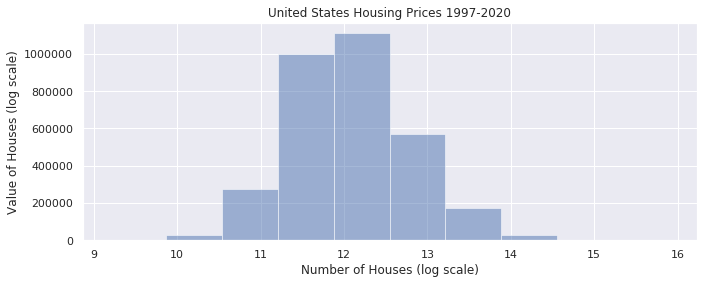

In [0]:
#Plot of Log Values
plt.hist(zillowUSA97to17['LogValue'], alpha=0.5)
plt.xlabel('Number of Houses (log scale)')
plt.ylabel('Value of Houses (log scale)')
plt.title('United States Housing Prices 1997-2020')

Text(0.5, 1.0, 'United States Housing Prices 1997-2020')

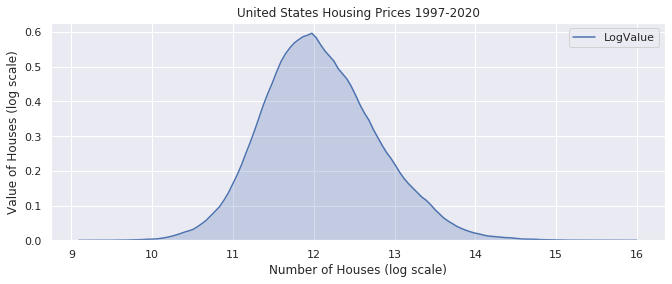

In [0]:
sns.kdeplot(zillowUSA97to17['LogValue'], shade=True)
plt.xlabel('Number of Houses (log scale)')
plt.ylabel('Value of Houses (log scale)')
plt.title('United States Housing Prices 1997-2020')

Text(0.5, 1.0, '400 Highest United States Housing Prices 1997-2020')

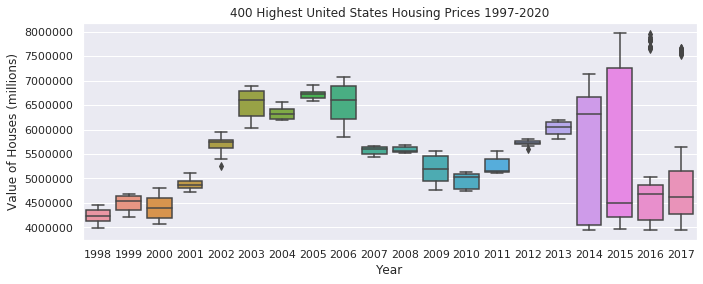

In [0]:
zillowUSATop400 = zillowUSA97to17.nlargest(400, ['Value'])
sns.boxplot(data=zillowUSATop400, x='Year', y='Value');
plt.ylabel('Value of Houses (millions)')
plt.title('400 Highest United States Housing Prices 1997-2020')

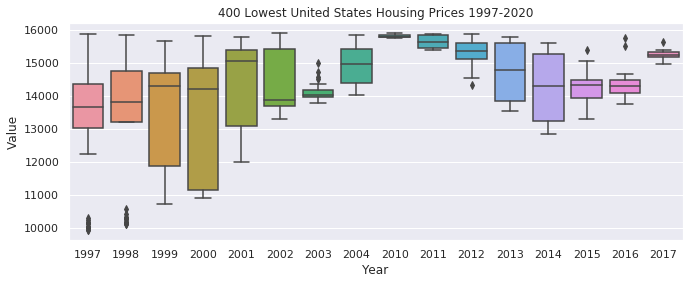

In [0]:
plt.title('400 Lowest United States Housing Prices 1997-2020')
zillowUSABottom400 = zillowUSA97to17.nsmallest(400, ['Value'])
sns.boxplot(data=zillowUSABottom400, x='Year', y='Value');

# 2.0 - MODEL

<Figure size 1152x432 with 0 Axes>

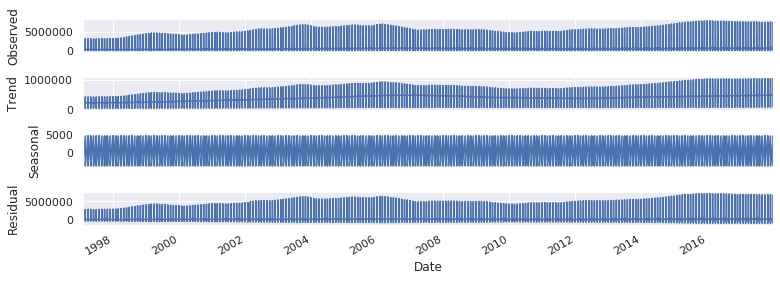

In [0]:
#Look at Residuals, Seasonal and Trend for the Zillow USA data.
#Since there is no noticeable patterns, no additional transforrmations are needed.
from pylab import rcParams
plt.figure(figsize=(16, 6))
res = sm.tsa.seasonal_decompose(zillowUSA97to17.Value,
                                freq=12,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

# 2.1 - Prophet - Analyze All Zip Codes By Year

### 2.1.1 - GDP Functions

In [0]:
#Function to predict 2018 GDP for top ten zip codes identified with Zillow forecast
def forecastZip(zip1, zillowByZip):
    house_model = Prophet(interval_width=0.95)
    house_model.fit(zillowByZip)
    future_dates = house_model.make_future_dataframe(periods=5, freq='YS')
    forecast = house_model.predict(future_dates)
    forecast_data_zip = forecast[['yhat']].tail(5)
    forecast_data_zip_all = forecast[['yhat']]
    #Calculate the RMSE
    #se1 = forecast_data_zip_all.loc[:, 'yhat'].to_numpy()
    #se2 = zillowUSA97to18zip.loc[zillowUSA97to18zip['RegionName']==zip1].Value
    #se = np.square(se1 - se2)
    #mse = np.mean(se)
    #Create variables to pass to accumulator
    #forecast_data_zip['zip1_idx'] = forecast_data_zip.index
    forecast_data_zip['zip1'] = zip1
    #forecast_data_county['state'] = state
    #forecast_data_zip['rmse'] = np.sqrt(mse)
    
    print (forecast_data_zip)
    return forecast_data_zip

def mainGDP():
    accumulator = pd.DataFrame([], columns=['zip1', 'state'])
    for zip1, rows in GDP_Prophet.groupby('ZIP'): 
          accumulator = pd.concat([accumulator, forecastZip(zip1, rows)], axis=0)
    #print(accumulator)
    accumulator.to_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutGDP.csv','a')

In [0]:
#mainGDP()

### 2.1.2 - Zillow Functions

In [0]:
#All zip codes by year by year ~265k observations
def forecastZip(zip1, zillowByZip):
    house_model = Prophet(interval_width=0.95)
    house_model.fit(zillowByZip)
    future_dates = house_model.make_future_dataframe(periods=1, freq='YS')
    forecast = house_model.predict(future_dates)
    forecast_data_zip = forecast[['yhat']].tail(5)
    forecast_data_zip_all = forecast[['yhat']]
    #Calculate the RMSE
    se1 = forecast_data_zip_all.loc[:, 'yhat'].to_numpy()
    se2 = zillowUSA97to18zip.loc[zillowUSA97to18zip['RegionName']==zip1].Value
    se = np.square(se1 - se2)
    mse = np.mean(se)
    #Create variables to pass to accumulator
    forecast_data_zip['zip1_idx'] = forecast_data_zip.index
    forecast_data_zip['zip1'] = zip1
    #forecast_data_county['state'] = state
    forecast_data_zip['rmse'] = np.sqrt(mse)

    print (forecast_data_zip)
    return forecast_data_zip

def mainZip():
    accumulator = pd.DataFrame([], columns=['zip1', 'state','year_idx', 'yhat', 'rmse'])
    for zip1, rows in zillowZipYears.groupby('RegionName'): 
          accumulator = pd.concat([accumulator, forecastZip(zip1, rows)], axis=0)
    accumulator.to_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutZip.csv','a')

In [0]:
#mainZip()

In [0]:
# Create dataset grouped by state and week
# zillowUSAmonths = zillowUSA97to17.loc[zillowUSA97to17['RegionName']=='08401']
# #zillowUSAmonths = zillowUSA97to17.loc[zillowUSA97to17['State']=="WI"]
# #zillowUSAmonths = zillowUSAmonths.reset_index(drop=True)
# #zillowUSAmonths   = zillowUSAmonths.drop(['Month','SizeRank','RegionID'], axis=1)
# #zillowUSAmonths = zillowUSAmonths.groupby(["State","Year"],as_index=False).mean()
# #zillowUSAmonths.index = pd.to_datetime(zillowUSAmonths['Year'], format='%Y')
# #zillowUSAmonths['Date'] = zillowUSAmonths.index
# zillowUSAmonths = zillowUSAmonths.rename(index=str, columns={"Date":"ds","Value":"y"})
# zillowUSAmonths['ds'] = zillowUSAmonths.index
# zillowUSAmonths = zillowUSAmonths[["ds","y","RegionName","Year"]]
# zillowUSAmonths = zillowUSAmonths.reset_index(drop=True)

In [0]:
# #All zip codes by month
# def forecastZip(zip1, zillowByZip):
#     house_model = Prophet(interval_width=0.95)
#     house_model.fit(zillowByZip)
#     future_dates = house_model.make_future_dataframe(periods=12, freq='MS')
#     forecast = house_model.predict(future_dates)
#     forecast_data_zip = forecast[['yhat']].tail(5)
#     forecast_data_zip_all = forecast[['yhat']]
#     #Calculate the RMSE
#     # se1 = forecast_data_zip_all.loc[:, 'yhat'].to_numpy()
#     # se2 = zillowUSA97to18zip.loc[zillowUSA97to18zip['RegionName']==zip1].Value
#     # se = np.square(se1 - se2)
#     # mse = np.mean(se)
#     #Create variables to pass to accumulator
#     forecast_data_zip['zip1_idx'] = forecast_data_zip.index
#     forecast_data_zip['zip1'] = zip1
#     #forecast_data_county['state'] = state
#     #forecast_data_zip['rmse'] = np.sqrt(mse)

#     print (forecast_data_zip)
#     return forecast_data_zip

# def mainZip2():
#     accumulator = pd.DataFrame([], columns=['zip1', 'state','year_idx', 'yhat','Year'])
#     for zip1, rows in zillowUSAmonths.groupby('RegionName'): 
#           accumulator = pd.concat([accumulator, forecastZip(zip1, rows)], axis=0)
#     #accumulator.to_csv('/content/drive/My Drive/Colab Notebooks/IST718/Lab2/ProphetOutZip.csv','a')

# 2.2 - AtsPy - Analyze Single Zip Codes By Month

## 2.2.1 - Install AtsPy Packages

In [0]:
!pip install atspy
!pip install pigar
#!pip install pydantic==1.4
!pip freeze > requirements.txt
from atspy import AutomatedModel

## 2.2.2.- Functions

In [0]:
#Code for running metro against all records
def ForecastMetro(metro):
  zillowByMetro = zillowUSA97to17.loc[zillowUSA97to17['Metro']==metro]
  del zillowByMetro.index.name
  zillowByMetro = zillowByMetro.groupby(['Date'],as_index=False).mean()
  zillowByMetro = zillowByMetro[['Value', 'Date']] 
  zillowByMetro.index = pd.to_datetime(zillowByMetro['Date'], format='%Y%m%d')
  zillowByMetro = zillowByMetro.set_index('Date') 
  #if len(zillowByMetro) < 3:
    #return None
  #elif len(zillowByMetro) > 3:
    #model_list=["ARIMA","Gluonts","Prophet","NBEATS", "TBAT", "TATS", "TBATS1", "TBATP1", "TBATS2"]
  model_list=["ARIMA","Gluonts","Prophet"]
  am = AutomatedModel(df = zillowByMetro, model_list=model_list, season="infer_from_data",forecast_len=12)
  forecast_in, performance = am.forecast_insample()
  forecast_out = am.forecast_outsample()
  all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)
  print(forecast_out.head(12))
  print(performance.head(12))
  all_performance
  all_ensemble_in[["Target","Prophet","ARIMA","Gluonts"]].plot()
  all_ensemble_in
  all_ensemble_out
  all_ensemble_out[["Prophet","ARIMA","Gluonts"]].plot()
  am.models_dict_in
  am.models_dict_out

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.62it/s, avg_epoch_loss=10.5]
INFO:root:Epoch[0] Elapsed time 7.551 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.458075
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.02it/s, avg_epoch_loss=9.73]
INFO:root:Epoch[1] Elapsed time 7.122 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.725818
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.94it/s, avg_epoch_loss=9.38]
INFO:root:Epoch[2] Elapsed time 7.202 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.375242
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.81it/s, avg_epoch_loss=9.22]
INFO:root:Epoch[3] Elapsed time 7.348 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.219258
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.15it/s, avg_epoch_loss=9.08]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 24.62it/s, avg_epoch_loss=11]
INFO:root:Epoch[0] Elapsed time 2.033 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.017644
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.71it/s, avg_epoch_loss=9.84]
INFO:root:Epoch[1] Elapsed time 1.874 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.835759
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.04it/s, avg_epoch_loss=9.69]
INFO:root:Epoch[2] Elapsed time 1.923 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.690902
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.16it/s, avg_epoch_loss=9.63]
INFO:root:Epoch[3] Elapsed time 1.843 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.625574
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=9.56]
INFO:

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
367  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                    ARIMA        Gluonts        Prophet
Date                                                   
2018-01-31  131969.149750  131142.156250  127761.860957
2018-02-28  132215.424970  132401.578125  127869.769228
2018-03-31  132399.298620  132270.406250  127997.531953
2018-04-30  132566.452711  132353.390625  128130.147863
2018-05-31  132726.068365  1

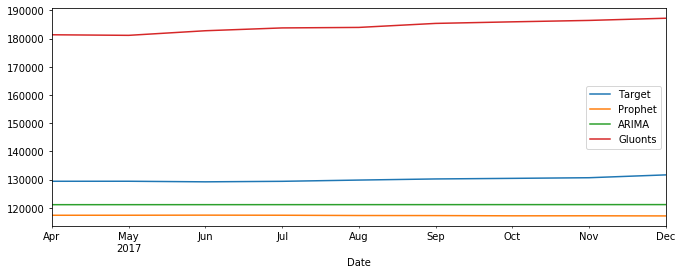

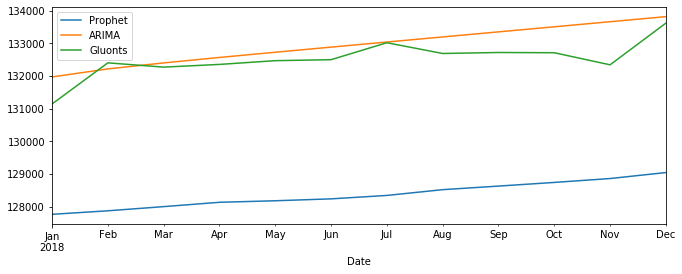

In [0]:
#ForecastMetro("Hot Springs")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.78it/s, avg_epoch_loss=11.3]
INFO:root:Epoch[0] Elapsed time 7.374 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.291791
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.09it/s, avg_epoch_loss=9.98]
INFO:root:Epoch[1] Elapsed time 7.054 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.982148
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.12it/s, avg_epoch_loss=9.51]
INFO:root:Epoch[2] Elapsed time 7.030 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.507355
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.95it/s, avg_epoch_loss=9.22]
INFO:root:Epoch[3] Elapsed time 7.192 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.218694
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.99it/s, avg_epoch_loss=9.09]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.16it/s, avg_epoch_loss=11.1]
INFO:root:Epoch[0] Elapsed time 1.990 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.144783
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.07it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[1] Elapsed time 1.849 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.201208
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.27it/s, avg_epoch_loss=10.1]
INFO:root:Epoch[2] Elapsed time 1.836 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.097039
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.65it/s, avg_epoch_loss=9.97]
INFO:root:Epoch[3] Elapsed time 1.810 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.965048
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.19it/s, avg_epoch_loss=9.92]
I

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
406  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                    ARIMA        Gluonts        Prophet
Date                                                   
2018-01-31  168270.524773  159727.812500  165251.042149
2018-02-28  168763.685814  160621.421875  165829.623626
2018-03-31  169228.819205  160381.265625  166315.154901
2018-04-30  169669.535696  159961.906250  166805.095418
2018-05-31  170087.866236  1

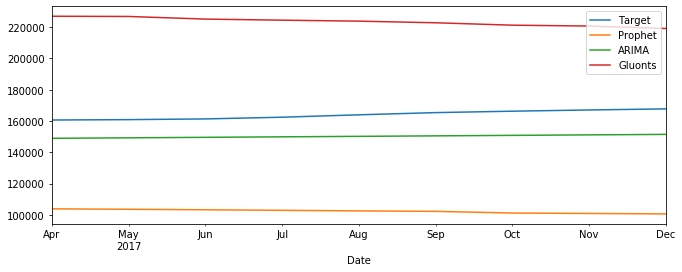

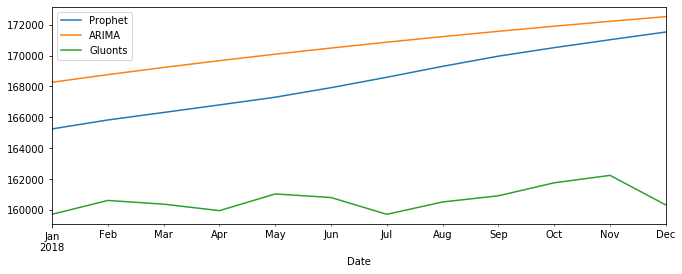

In [0]:
#ForecastMetro("Fayetteville-Springdale-Rogers")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.62it/s, avg_epoch_loss=11.2]
INFO:root:Epoch[0] Elapsed time 7.562 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.179832
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.96it/s, avg_epoch_loss=9.91]
INFO:root:Epoch[1] Elapsed time 7.181 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.914302
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.01it/s, avg_epoch_loss=9.24]
INFO:root:Epoch[2] Elapsed time 7.139 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.241395
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.07it/s, avg_epoch_loss=9.08]
INFO:root:Epoch[3] Elapsed time 7.073 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.084368
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.14it/s, avg_epoch_loss=8.95]
INF

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 25.82it/s, avg_epoch_loss=11.8]
INFO:root:Epoch[0] Elapsed time 1.941 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.775434
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.39it/s, avg_epoch_loss=9.65]
INFO:root:Epoch[1] Elapsed time 1.897 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.652036
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.19it/s, avg_epoch_loss=9.53]
INFO:root:Epoch[2] Elapsed time 1.911 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.527666
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.23it/s, avg_epoch_loss=9.52]
INFO:root:Epoch[3] Elapsed time 1.909 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.516347
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.30it/s, avg_epoch_loss=9.32]
INF

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
254  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                    ARIMA        Gluonts        Prophet
Date                                                   
2018-01-31  140346.687120  139034.125000  137302.297017
2018-02-28  140845.190957  143001.109375  137499.193881
2018-03-31  141356.899845  142567.125000  137621.883345
2018-04-30  141846.756771  142134.062500  137754.100633
2018-05-31  142334.354435  1

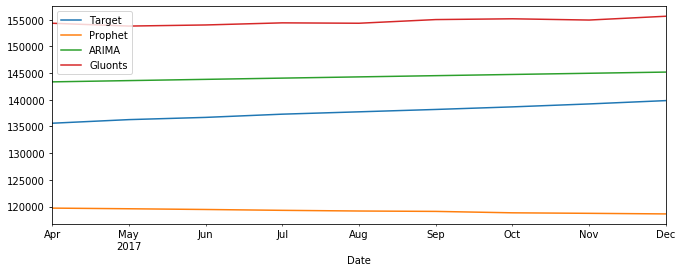

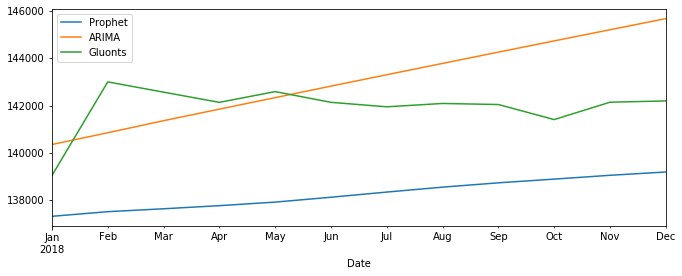

In [0]:
## NEED TO TROUBLESHOOT ERROR
ForecastMetro("Little Rock-North Little Rock-Conway")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.49it/s, avg_epoch_loss=10.4]
INFO:root:Epoch[0] Elapsed time 7.709 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.436254
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.01it/s, avg_epoch_loss=9.2]
INFO:root:Epoch[1] Elapsed time 7.139 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.201432
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.83it/s, avg_epoch_loss=8.64]
INFO:root:Epoch[2] Elapsed time 7.327 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=8.639679
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.97it/s, avg_epoch_loss=8.47]
INFO:root:Epoch[3] Elapsed time 7.174 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.466348
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.80it/s, avg_epoch_loss=8.38]
INFO

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 26.48it/s, avg_epoch_loss=10.6]
INFO:root:Epoch[0] Elapsed time 1.891 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=10.564788
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.89it/s, avg_epoch_loss=9.3]
INFO:root:Epoch[1] Elapsed time 2.095 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=9.303562
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.75it/s, avg_epoch_loss=8.93]
INFO:root:Epoch[2] Elapsed time 2.023 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=8.928184
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.65it/s, avg_epoch_loss=8.94]
INFO:root:Epoch[3] Elapsed time 1.880 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.944658
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.01it/s, avg_epoch_loss=8.79]
INFO

Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
221  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble
                   ARIMA       Gluonts       Prophet
Date                                                
2018-01-31  93916.778110  92387.062500  92460.610077
2018-02-28  94343.250049  91994.320312  92743.435010
2018-03-31  94571.188799  92030.796875  92986.424555
2018-04-30  94815.624544  91961.882812  93235.684713
2018-05-31  95019.929158  92048.109375  93497.

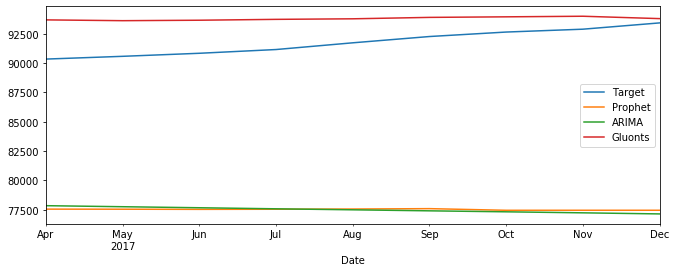

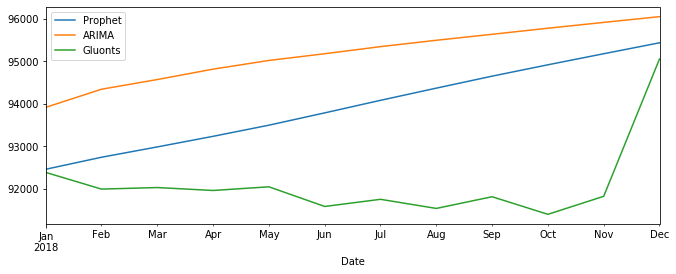

In [0]:
# NEED TO TROUBLESHOOT ERROR
#ForecastMetro("Searcy")

In [0]:
#Code for running Top Zip Code Analysis
def ForecastTopZips(top):
  zillowByTopZips = zillowUSA97to17.loc[zillowUSA97to17['RegionName']==top]
  del zillowByTopZips.index.name
  zillowByTopZips = zillowByTopZips.groupby(['Date'],as_index=False).mean()
  zillowByTopZips = zillowByTopZips[['Value', 'Date']] 
  zillowByTopZips.index = pd.to_datetime(zillowByTopZips['Date'], format='%Y%m%d')
  zillowByTopZips = zillowByTopZips.set_index('Date') 
  #if len(zillowByTopZips) < 3:
    #return None
  #elif len(zillowByTopZips) > 3:
    #model_list=["ARIMA","Gluonts","Prophet","NBEATS", "TBAT", "TATS", "TBATS1", "TBATP1", "TBATS2"]
  model_list=["ARIMA","Gluonts","Prophet"]
  am = AutomatedModel(df = zillowByTopZips, model_list=model_list, season="infer_from_data",forecast_len=12)
  forecast_in, performance = am.forecast_insample()
  forecast_out = am.forecast_outsample()
  all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)
  forecast_out.head()
  print(forecast_out.head(12))
  print(performance.head(12))
  all_performance
  all_ensemble_in[["Target","Prophet","ARIMA","Gluonts"]].plot()
  all_ensemble_in
  all_ensemble_out
  all_ensemble_out[["Prophet","ARIMA","Gluonts"]].plot()
  am.models_dict_in
  am.models_dict_out

In [0]:
ForecastTopZips("08401")

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
189
An insample split of training size 189 and testing size 63 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.59it/s, avg_epoch_loss=11.8]
INFO:root:Epoch[0] Elapsed time 7.588 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=11.791581
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.88it/s, avg_epoch_loss=10.2]
INFO:root:Epoch[1] Elapsed time 7.273 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.201271
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.97it/s, avg_epoch_loss=9.71]
INFO:root:Epoch[2] Elapsed time 7.171 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=9.710132
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.82it/s, avg_epoch_loss=9.44]
INFO:root:Epoch[3] Elapsed time 7.332 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=9.438015
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.99it/s, avg_epoch_loss=9.32]
IN

Model Prophet is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 26.49it/s, avg_epoch_loss=12.2]
INFO:root:Epoch[0] Elapsed time 1.890 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=12.187283
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.14it/s, avg_epoch_loss=10.8]
INFO:root:Epoch[1] Elapsed time 1.846 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=10.756082
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.93it/s, avg_epoch_loss=10.4]
INFO:root:Epoch[2] Elapsed time 1.792 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=10.404580
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.68it/s, avg_epoch_loss=10.1]
INFO:root:Epoch[3] Elapsed time 1.810 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=10.072367
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.59it/s, avg_epoch_loss=10.1]


Model Prophet is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
327  variables are found to be almost constant


ValueError: ignored

In [0]:
ForecastTopZips("08232")

In [0]:
ForecastTopZips("60475")

In [0]:
ForecastTopZips("08241")

In [0]:
ForecastTopZips("19013")

# 3.0 - INTERPRET

In [0]:
#Bar plot of Forecast growth using Zillow data from 1997-2017 data and predicting 2018
height = Z_Top5_97_18.Growth97_18.sort_values(ascending=False)
bars = Z_Top5_97_18.RegionName
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Top Zip Codes for Projected Growth from 1997 to 2018 based on 1997-2017 Zillow Average Housing Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

In [0]:
#Bar plot of Forecast growth using Zillow data from 1997-2017 data and predicting 2018
height = Z_Top5_17_18.Growth17_18.sort_values(ascending=False)
bars = Z_Top5_17_18.RegionName
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Top Zip Codes for Projected Growth from 2017 to 2018 based on 1997-2017 Zillow Average Housing Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

In [0]:
#Bar plot of Forecast GDP growth using 2001-2017 data and predicting 2018
height = G_Top5_01_18.Growth01_18.sort_values(ascending=False)
bars = G_Top5_01_18.ZIP_x
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Evaluation of Zillow Forecasted Top Zip Codes for 1997-2018 with 2001-2017 GDP Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

In [0]:
#Bar plot of Forecast GDP growth using 2001-2017 data and predicting 2018
height = G_Top5_17_18.Growth17_18.sort_values(ascending=False)
bars = G_Top5_17_18.ZIP_x
y_pos = np.arange(len(bars))
 # Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Evaluation of Zillow Forecasted Top Zip Codes for 2017-2018 with 2001-2017 GDP Data')
plt.xlabel('Zip Codes')
plt.ylabel('Percent Increase (1.0 = 100%)')
# Show graphic
plt.show()

# 4.0 - MAPPING

In [0]:
ZipMap = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IST718/Lab2/us-zip-code-latitude-and-longitude.csv", sep=';')
ZipMap

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.393980,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.160560,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.743570,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.897540,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.980270,-6,1,"41.194129,-91.98027"
...,...,...,...,...,...,...,...,...
43186,45002,Cleves,OH,39.180358,-84.737830,-5,1,"39.180358,-84.73783"
43187,38695,Water Valley,MS,34.164116,-89.625197,-6,1,"34.164116,-89.625197"
43188,43828,Keene,OH,40.351271,-81.873607,-5,1,"40.351271,-81.873607"
43189,30177,Tate,GA,34.418116,-84.384620,-5,1,"34.418116,-84.38462"


In [0]:
#Create df with name,pop, lat, lon (School, TotalComp, latitude, longitude)

df = coaches5[['School','TotalComp','latitude','longitude','Conference']]
df = df.sort_values(by=['Conference'],ascending=True)
df = df.reset_index()

In [0]:
# THIS IS AN INTERACTIVE GRAPHIC.  CLICK THE LEGEND BUBBLES TO SHOW/HIDE DIFFERENT REGIONS.
# The plot could be improved by replacing the numbers in the legend with the names of the regions.
# However, this was difficult technically and the left legend was added as a temporary solution.

#Geographic view of Coaches Compensation by School.  Code Source: https://plotly.com/python/bubble-maps/
#df['text'] = df['School'] + " " + (df['TotalComp']/1e6).astype(str)+' million'
limits = [(0,9),(9,23),(23,32),(32,46),(46,59),(59,62),(62,73),(73,85),(85,97),(97,110)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
#cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        #text = df_sub['School'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['TotalComp']/scale,
            #color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'NCAA Division 1 Coaches by Total Compensation\
        <br><br>AAC(0-9)<br>ACC(9-23)\
        <br>Big 12(23-32)<br>Big Ten(32-46)<br>C-USA(46-59)<br>Ind.(59-62)\
        <br>MAC(62-73)<br>Mt. West(73-85)<br>PAC-12(85-97)<br>SEC(97-110)\
        <br><br>(Click legend to<br> toggle Conferences)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

In [0]:
raise SystemExit("Stop right there!")

# Time Series Code Book

In [0]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

#series1 = Series.from_csv('data/Dept1.csv', header=0)

X = zillowARseries.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary = stationary.astype("float")
stationary.index = zillowARseries.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('/content/drive/My Drive/Colab Notebooks/stationary.csv')
# plot
stationary.plot()
#pyplot.show()

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
# USING STATIONARY TIME SERIES LOOK FOR ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

stationary = read_csv('/content/drive/My Drive/Colab Notebooks/stationary.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

stationary.plot()
pyplot.show()

plot_acf(stationary, ax=pyplot.gca())
pyplot.show()

plot_pacf(stationary, ax=pyplot.gca())
pyplot.show()

## DEPICTS SOME SEASONALITY IN PACF STILL
## START POINT FOR ARIMA COULD BE 2,1,1

In [0]:
##CHECK THAT THERE ARE ENOUGH OBSERVATIONS IN VALIDATION

# CREATE TRAIN-TEST DATA
# DATA IS WEEKLY FOR 2+ years
# KEEP ONE QUARTER - 13 weeks - AS THE TEST DATA
#series = Series.from_csv('data/Dept1.csv', header=0)
split_point = len(zillowARseries) - 13
dataset, validation = zillowARseries[0:split_point], zillowARseries[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')
validation.to_csv('/content/drive/My Drive/Colab Notebooks/validation.csv')

In [0]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
#Check GPU type for Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [0]:
#Check RAM usage in Colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [0]:
# load data
datasetSer = read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# prepare data
X = datasetSer.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))


In [0]:
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

In [0]:
# # CODE RUNS LONG FOR EVALUATION - approximately 
# import warnings
# import numpy
 
# # create a differenced series
# def difference(dataset, interval=1):
# 	diff = list()
# 	for i in range(interval, len(dataset)):
# 		value = dataset[i] - dataset[i - interval]
# 		diff.append(value)
# 	return numpy.array(diff)
 
# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
# 	return yhat + history[-interval]
 
# # evaluate an ARIMA model for a given order (p,d,q) and return RMSE
# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	X = X.astype('float32')
# 	train_size = int(len(X) * 0.50)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		# difference data
# 		months_in_year = 12
# 		diff = difference(history, months_in_year)
# 		model = ARIMA(diff, order=arima_order)
# 		model_fit = model.fit(trend='nc', disp=0)
# 		yhat = model_fit.forecast()[0]
# 		yhat = inverse_difference(history, yhat, months_in_year)
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	mse = mean_squared_error(test, predictions)
# 	rmse = sqrt(mse)
# 	return rmse
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					mse = evaluate_arima_model(dataset, order)
# 					if mse < best_score:
# 						best_score, best_cfg = mse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,mse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# #series = Series.from_csv('data/Dept1.csv', header=0)
# # evaluate parameters
# p_values = range(0, 7)
# d_values = range(0, 3)
# q_values = range(0, 7)
# warnings.filterwarnings("ignore")
# evaluate_models(zillowARseries.values, p_values, d_values, q_values)

# #COMMENTS FROM PROFESSOR FOX ON VALUES BELOW:
# #AUTOREGRESSIVE STARTS AT 0
# #INTEGRATIVE ELEMENT STARTES AT 0 (FOR SEASONALITY AND TREND)
# #MOVING AVERAGE STARTS AT 1
# #CALCULATE ROOT MEAN SQUARED FOR EACH CONFIGURATION AND PROVIDE THE BEST
# #RUN ONE MORE TEST OF RESIDUALS AS HISTORGRAM AND DENSITY PLOTS (MEAN 0 WITH STD DISTRIBUTION)

In [0]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
#series = Series.from_csv('data/Dept1.csv', header=0)
# prepare data
X = zillowARseries.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [0]:
## RECREATE ANALYSIS WITH MEAN RESIDUAL ADDED TO EACH PREDICTION
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
#series = Series.from_csv('data/Dept1.csv', header=0)
# prepare data
X = zillowARseries.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
# WHERE DID BIAS VALUE COME FROM?
bias = -120.713087
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [0]:
# LOOK AT ACF AND PACF FOR RESIDUALS
plot_acf(residuals, ax=pyplot.gca())
pyplot.show()

plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [0]:
## CODE FROM BROWNLEE FOR SAVING MODEL

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
#series = Series.from_csv('data/Dept1.csv', header=0)
# prepare data
X = zillowARseries.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(2,0,0))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual - CHANGED TO ZERO
bias = 0
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])


In [0]:
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING ONE STEP AHEAD

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

#series = Series.from_csv('data/Dept1.csv', header=0)
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(zillowARseries.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

In [0]:
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING MANY STEPS AHEAD

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load and prepare datasets
dataset = read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Week4/dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('/content/drive/My Drive/Colab Notebooks/IST718/Week4/validation.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [0]:
plot_acf(zillowARseries, ax=pyplot.gca())
pyplot.show()

#pyplot.subplot(212)

plot_pacf(zillowARseries, ax=pyplot.gca())
pyplot.show()

# Arima Tutorial Code

In [0]:
# ## CHANGE TO USE SERIES
# # ARIMA model
# #https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# from statsmodels.tsa.arima_model import ARIMA
# from matplotlib import pyplot
 
# # def parser(x):
# # 	return datetime.strptime('190'+x, '%Y-%m')

# # fit model
# model = ARIMA(zillowARseries.Value, order=(5,1,0))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())
# # plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())

In [0]:
# # Sample code for ARIMA prediction
# # https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error
 
# #def parser(x):
# 	#return datetime.strptime('190'+x, '%Y-%m')
 
# #series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# X = series.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# for t in range(len(test)):
# 	model = ARIMA(history, order=(5,1,0))
# 	model_fit = model.fit(disp=0)
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()